# Change the runtime to GPU

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
##each fish type folder, contains 2 subfolders, one is 1000 augmented fish images and
# another one is GT ground truth of fish images
#GroundTruth images are obtained by segmentation out of augmented images But we will not use the GT images

In [ ]:
pip install opendatasets

In [ ]:
#import all the necessary libraries
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os

''' Graphs and charts'''
import matplotlib.pyplot as plt
import seaborn as sns

'''tensorflow/sklearn'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Model for  Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2

'''Image generation and preprocessing'''
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# see this link for more guide
#first kaggle.jon file needs to be downloaded and open in notebook,  username and key can be found there
## https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/

import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset")

Skipping, found downloaded files in "./a-large-scale-fish-dataset" (use force=True to force download)


### **Exploratory Analysis**

In [ ]:
DIR = '/content/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' #Creating a master directory
#assigning an existing file paths to the variable DTR
# just right click on the folder in the right side of window in the input part and copy the link and paste it here
classes = [i for i in os.listdir(DIR) if '.' not in i]    #Creating classes out of the subfolders inside the directory "DTR"
classes # Different fish species
#if '.' not in i: This condition checks if there is no period (".") in the name of each item (i).
#This condition is used to filter out items that have a period in their name,
#which typically indicates a file rather than a directory.
# discard the readme.text and other files in this directory

['Shrimp',
 'Gilt-Head Bream',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Sea Bream',
 'Hourse Mackerel',
 'Striped Red Mullet',
 'Trout',
 'Red Mullet']

In [ ]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):
    for filename in filenames:  #loop over the filenames in the current directory (dirname
        if os.path.splitext(filename)[-1]=='.png':  #3              # If filename contains .png
            if dirname.split()[-1]!='GT':         #4               # If directory doesn't contain GT
                label.append(os.path.split(dirname)[-1])   #5        # Append the directory name to label
                path.append(os.path.join(dirname,filename))  #6    # Append all the png files to path of that directory


#desciption of code:
#os.walk(DIR) generates the file names in a directory tree by walking through the directory hierarchy rooted at DIR  generates the file names in a directory tree by walking through the directory hierarchy rooted at DIR
# "dirname" is full address
# (os.path.split(dirname)[-1])  is last part which is name of fish (class)

#  The _ (underscore) is used as a convention to indicate that we are not interested in the list of subdirectories (dirnames) in this case.
#3  if os.path.splitext(filename)[-1] == '.png':: This condition checks if the extension of the current filename is .png. The os.path.splitext() function is used to split the filename into its base name and extension, and [-1] retrieves the extension part.

# 4 if dirname.split()[-1] != 'GT':: This condition checks if the last part of the split dirname (using whitespace as the delimiter) is not equal to 'GT'. It ensures that subdirectories ending with the name 'GT' are excluded.
# [-1]  Last element does not contain(!=)  the 'white space GT' go to do the next line
# 5  abel.append(os.path.split(dirname)[-1]): This line extracts the label from the directory name and appends it to the label list. The os.path.split() function is used to split dirname into its parent directory and the last part (label), and [-1] retrieves the label part.

#6  path.append(os.path.join(dirname, filename)): This line constructs the full path of the PNG file by joining dirname and filename using os.path.join() and appends it to the path list.


# make a datafram which contains both path and label(classes) as separated columns
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [ ]:
df.iloc[0]['path']


'/content/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00752.png'

In [ ]:
df.path[0]

'/content/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00752.png'

In [ ]:
df.head()

,path,label
0,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp
1,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp
2,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp
3,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp
4,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
df['label'].value_counts() # number of datapoints in each category
#dataset is ballanced

Shrimp                1000
Gilt-Head Bream       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Sea Bream         1000
Hourse Mackerel       1000
Striped Red Mullet    1000
Trout                 1000
Red Mullet            1000
Name: label, dtype: int64

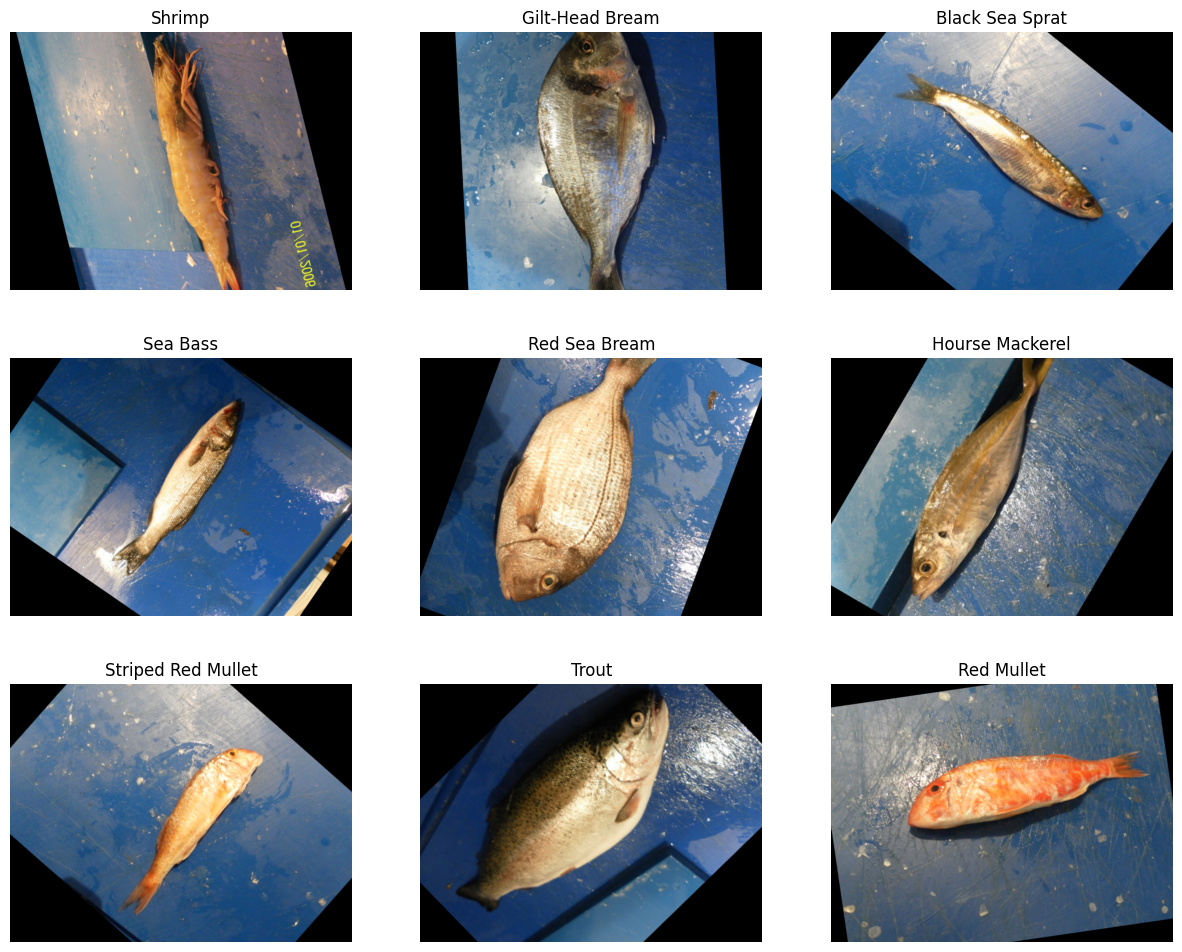

In [ ]:
idx = 0
plt.figure(figsize=(15,12))
#df['label'].unique(): unique name of labels(name of fishes)

for i in df['label'].unique():
    plt.subplot(3, 3, idx+1) #idx starts as 0    Defines a subplot within a grid of 3 by 3.
    #The idx+1 value determines the position of the subplot in the grid
    plt.imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    """
    df[df['label']==i].iloc[0,0]) result is first element of first column of filtered df based on that specific label column.
    first column is path so output is the path of fisrt image in the i category
    """
    plt.title(i)
    plt.axis('off')
    idx+=1

***Prepration of train and test set***

In [ ]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
#first shuffle the rows then split ,  random_state=42 to get the same split all the time
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


***Image Generation and Preprocessing***

Preprocessing should be the exact same way  of the model we are going to use.

**Transfer learning** we used the prebuilt model that is trained on a very large dataset and apply it on the similar dataset (here fish identification). it means we are going to use the same wieghts and bias terms in this model.
Mobilenet artichecture we are going to use

In [ ]:
"""
ImageDataGenerator: is a class from the Keras library that performs real-time data augmentation on images.
It generates batches of augmented images during the training or testing phase.

train_generator OBJECT is created by instantiating the ImageDataGenerator class
for train as well as applying the preprocess to each images, also reserve 20% of images for validation task.
The preprocess_input function is typically used to perform normalization or other preprocessing operations on the images.

"""
## First we make a image generator
##in the next cell, we create images out of these generators

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)



In [ ]:
#Data Augmentation and transformation
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )

test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )
#  X_col='path'  path of images
""" #Class mode:  It defines the type of labels. 'categorical' indicates that the labels are in categorical format, suitable for multi-class classification
# will be converted  to one-hot encoding format [1,0,0,0,0,0,0,0,0], ...
this class mode gives one number or index to each class so we have 0 to 8 value"""
#batch_size: It determines the number of samples in each batch of the generated data. In this case, each batch will contain 32 images.
#shuffle: It specifies whether to shuffle the order of the images within each batch. Here, it is set to True, meaning the images will be shuffled.
#seed: It sets the random seed for reproducibility. The value 42 is used as the seed.
#subset: It specifies which subset of the DataFrame to use. 'training' indicates that the generator will be used for the training subset.this subsets are created in the process of creaing image generator class(train_generator)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


" #Class mode:  It defines the type of labels. 'categorical' indicates that the labels are in categorical format, suitable for multi-class classification\n# will be converted  to one-hot encoding format [1,0,0,0,0,0,0,0,0], ...\nthis class mode gives one number or index to each class so we have 0 to 8 value"

In [ ]:
methods = dir(train_images)
print(methods)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_params', '_filepaths', '_filter_classes', '_filter_valid_filepaths', '_flow_index', '_get_batches_of_transformed_samples', '_keras_api_names', '_keras_api_names_v1', '_sample_weight', '_set_index_array', 'allowed_class_modes', 'batch_index', 'batch_size', 'class_indices', 'class_mode', 'classes', 'color_mode', 'data_format', 'directory', 'dtype', 'filenames', 'filepaths', 'get_classes', 'image_data_generator', 'image_shape', 'index_array', 'index_generator', 'interpolation', 'keep_aspect_ratio', 'labels', 'lock', 'n', 'next', 'on_epoch_end', 'reset', 'sample_weight', 'samples', 'save_format

In [ ]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

(2, 3)


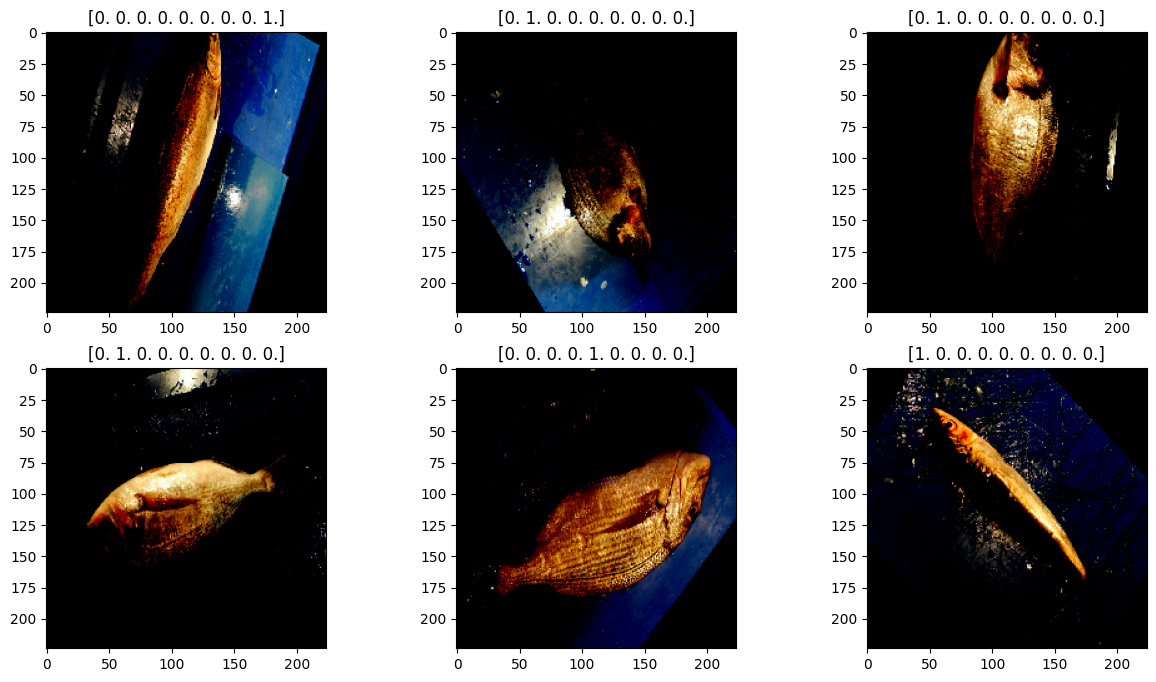

In [ ]:
#Plotting images after pre-processing

fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
"""
This line creates a empty figure with 2 rows and 3 columns of subplots, resulting in a grid of 6 subplots.
The figsize parameter sets the size of the figure in inches, with a width of 15 and height of 8.
The ax variable is a NumPy array that contains references to each individual subplot.
"""
print(ax.shape) #(2, 3)

ax=ax.flatten() #converting it from a 2-dimensional array into a 1-dimensional array. This makes it easier to iterate over the subplots using a single loop.
j=0
for _ in range(6): #6 subplot in the grid
    img, label = test_images.next()
    """
his line retrieves the next batch of images and labels from the test_images object.
It assumes that test_images is an iterator or generator that provides batches of images and labels.

    """
    ax[j].imshow(img[0],)
    """
    his line retrieves the next batch of images and labels from the test_images object.
    It assumes that test_images is an iterator or generator that provides
    batches of images and labels.
    """
    ax[j].set_title(label[0])
    """
    This line sets the title of the subplot at index j in the ax array to the corresponding label of the image
    """
    j=j+1
    """
    This line increments the j variable by 1, moving to the next subplot in the ax array.
    """

### **MobileNetv2  Model**

In [ ]:
#Importing our pretrained model : MobileNetV2
#we are using using TensorFlow's Keras API to instantiate a pre-trained MobileNetV2 model for transfer learning.

pt_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False, # do not import classification layer(last layer)
    weights='imagenet',
    pooling='avg'
)
"""
include_top=False:
This parameter indicates whether to include the top (classification) layers of the MobileNetV2 model.
By setting it to False, you exclude the fully connected layers at the end of the network,
which are typically used for classification.
This allows you to use the MobileNetV2 model as a feature extractor.
"""

"""
weights='imagenet':
This parameter specifies the weight initialization for the MobileNetV2 model.
By setting it to 'imagenet', you initialize the model with pre-trained weights that were trained on the ImageNet dataset.
These pre-trained weights can provide a good starting point for transfer learning.
"""
"""
pooling='avg':
This parameter determines the type of pooling to be applied after the convolutional layers of the MobileNetV2 model.
By setting it to 'avg', global average pooling is applied, which calculates the average value of each feature map.
This reduces the spatial dimensions of the feature maps to a fixed size regardless of the input image size.
"""


pt_model.trainable = False

"""
pretrained_model.trainable = False:
This line sets the trainable attribute of the pretrained_model to False.
By doing this, you freeze the weights of the pre-trained MobileNetV2 model,
preventing them from being updated during training.
This is often done in transfer learning to keep the pre-trained weights intact and
only update the weights of the additional layers added on top for fine-tuning.

"""

9406464/9406464 [==============================] - 0s 0us/step


'\npretrained_model.trainable = False:\nThis line sets the trainable attribute of the pretrained_model to False.\nBy doing this, you freeze the weights of the pre-trained MobileNetV2 model,\npreventing them from being updated during training.\nThis is often done in transfer learning to keep the pre-trained weights intact and\nonly update the weights of the additional layers added on top for fine-tuning.\n\n'

In [ ]:
#Creating our model inputs
inputs = pt_model.input  #This line captures a reference to the input tensor(s) of the pre-trained MobileNetV2 model.
# we define two fully connected Dense layers  on the top of convolutional layes in the original model
x = tf.keras.layers.Dense(128, activation='relu')(pt_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
# 9 Classes  multi-class classification problem
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

"""
This line creates a new model by specifying the inputs and outputs.
The inputs variable contains the reference to the input tensor(s) of the MobileNetV2 model,
and the outputs variable contains the reference to the output tensor of the last layer.
"""

model = tf.keras.Model(inputs=inputs, outputs=outputs)    #[creating final model in this line]

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Only the parameters of the additional layers (two dense layers and 1 output layer) added on top of the MobileNetV2 model are trained.
history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)
#The training progress and evaluation metrics are stored in the history object.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
results = model.evaluate(test_images, verbose=0)
#evaluate: A method in TensorFlow's Model class that calculates the specified metrics on the provided test data.
#verbose=0: This parameter controls the verbosity of the evaluation process.
#By setting it to 0, it means that the evaluation will be performed silently without printing any progress or output.
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.00187
Test Accuracy: 100.00%


In [ ]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1) # highest probability will be the predicted class for that image
print(pred)

57/57 [==============================] - 18s 308ms/step
[8 1 6 ... 7 5 1]


### first option

In [ ]:
#we are creating a datafram which have a new column of predicted class for each image of test dataset
df_pred=test_df.copy()
#print(pred_df)
labels={}
#test_images.class_indices:
#By calling .items() on test_images.class_indices,
#you retrieve the key-value pairs from the dictionary as a list of tuples
for l,v in test_images.class_indices.items():
    labels.update({v:l})
#print(labels)
df_pred['pred']=pred # create a new column in pred_df
df_pred['pred_labels']=df_pred['pred'].apply(lambda x: labels[x])
print(df_pred)

                                                   path               label  \
7940  /content/a-large-scale-fish-dataset/Fish_Datas...               Trout   
1162  /content/a-large-scale-fish-dataset/Fish_Datas...     Gilt-Head Bream   
582   /content/a-large-scale-fish-dataset/Fish_Datas...              Shrimp   
4081  /content/a-large-scale-fish-dataset/Fish_Datas...       Red Sea Bream   
8412  /content/a-large-scale-fish-dataset/Fish_Datas...          Red Mullet   
...                                                 ...                 ...   
3063  /content/a-large-scale-fish-dataset/Fish_Datas...            Sea Bass   
6925  /content/a-large-scale-fish-dataset/Fish_Datas...  Striped Red Mullet   
6521  /content/a-large-scale-fish-dataset/Fish_Datas...  Striped Red Mullet   
3002  /content/a-large-scale-fish-dataset/Fish_Datas...            Sea Bass   
1298  /content/a-large-scale-fish-dataset/Fish_Datas...     Gilt-Head Bream   

      pred         pred_labels  
7940     8        

### Second option

In [ ]:
df_pred=test_df.copy()
#print(pred_df)
#test_images.class_indices:
#By calling .items() on test_images.class_indices,
#you retrieve the key-value pairs from the dictionary as a list of tuples
labels=dict(test_images.class_indices.items())
reversed_labels = {v: k for k, v in labels.items()}
print(reversed_labels)
df_pred['pred']=pred # create a new column in pred_df
df_pred['pred_labels'] = df_pred['pred'].apply(lambda x: reversed_labels[x])
df_pred

{0: 'Black Sea Sprat', 1: 'Gilt-Head Bream', 2: 'Hourse Mackerel', 3: 'Red Mullet', 4: 'Red Sea Bream', 5: 'Sea Bass', 6: 'Shrimp', 7: 'Striped Red Mullet', 8: 'Trout'}


,path,label,pred,pred_labels
7940,/content/a-large-scale-fish-dataset/Fish_Datas...,Trout,8,Trout
1162,/content/a-large-scale-fish-dataset/Fish_Datas...,Gilt-Head Bream,1,Gilt-Head Bream
582,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp,6,Shrimp
4081,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream,4,Red Sea Bream
8412,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Mullet,3,Red Mullet
...,...,...,...,...
3063,/content/a-large-scale-fish-dataset/Fish_Datas...,Sea Bass,5,Sea Bass
6925,/content/a-large-scale-fish-dataset/Fish_Datas...,Striped Red Mullet,7,Striped Red Mullet
6521,/content/a-large-scale-fish-dataset/Fish_Datas...,Striped Red Mullet,7,Striped Red Mullet
3002,/content/a-large-scale-fish-dataset/Fish_Datas...,Sea Bass,5,Sea Bass


In [ ]:
# Visualize the pred_df
df_pred=df_pred.reset_index(drop=True)  #reset_index : order the index from 0 to ...
#drop=True : No extra column for the index will be created
df_pred.head(10)

,path,label,pred,pred_labels
0,/content/a-large-scale-fish-dataset/Fish_Datas...,Trout,8,Trout
1,/content/a-large-scale-fish-dataset/Fish_Datas...,Gilt-Head Bream,1,Gilt-Head Bream
2,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp,6,Shrimp
3,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream,4,Red Sea Bream
4,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Mullet,3,Red Mullet
5,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Mullet,3,Red Mullet
6,/content/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel,2,Hourse Mackerel
7,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Mullet,3,Red Mullet
8,/content/a-large-scale-fish-dataset/Fish_Datas...,Sea Bass,5,Sea Bass
9,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream,4,Red Sea Bream


### visualize the images which were incorrectly predicted

In [ ]:
# Incorrect prediction
df_pred_wrong=df_pred[df_pred['label']!=df_pred['pred_labels']]
df_pred_wrong

,path,label,pred,pred_labels


In [ ]:
index_numbers = df_pred_wrong.index.tolist()
print(index_numbers)

[]


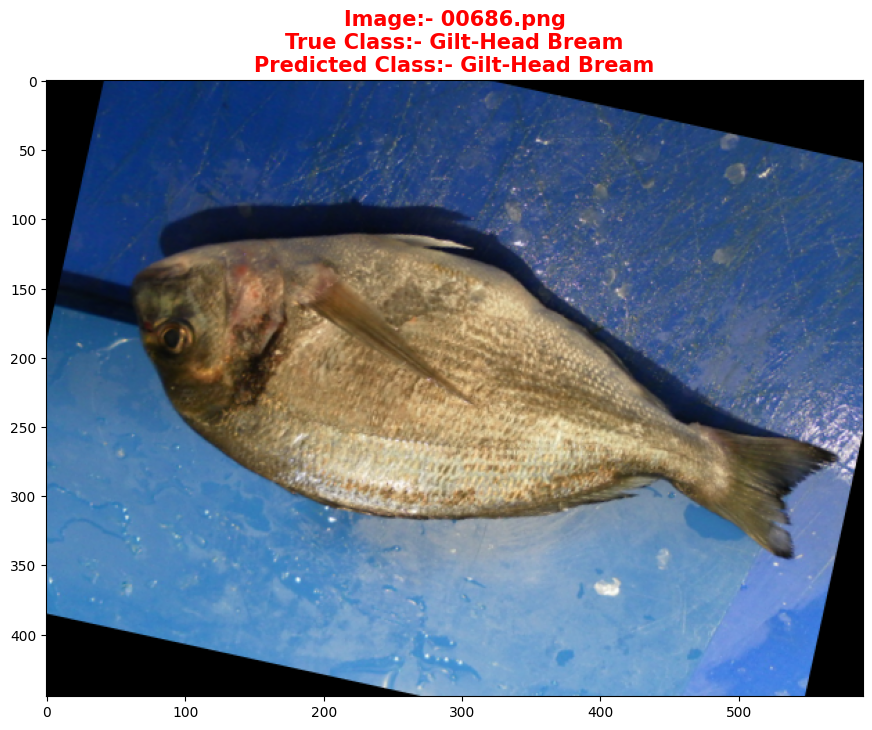

In [ ]:
# see one of the images incorreclty predicted
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(df_pred.path[1286]))
True_label = df_pred.path[1286].split('/')[-2]
Image_name = df_pred.path[1286].split('/')[-1]
Pred_label = df_pred.pred_labels[1286]
plt.title(f'Image:- {Image_name}\nTrue Class:- {True_label}\nPredicted Class:- {Pred_label}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

In [ ]:
#plot both wrobgly predicted labels in subplot changes dynamically based on the number of incorrect predictions
import math
plt.figure(figsize=(15,8))
index_numbers = df_pred_wrong.index.tolist()
num_images = len(index_numbers)
# Calculate the number of rows and columns for the grid
num_rows = math.ceil(num_images / 3)
num_cols = min(num_images, 3)

idx=0
for i in range(len(index_numbers)):
    ind=index_numbers[i]
    plt.subplot(num_rows, num_cols, idx+1)
    plt.imshow(plt.imread(df_pred.path[ind]))
    True_label = df_pred.path[ind].split('/')[-2]
    Image_name = df_pred.path[ind].split('/')[-1]
    Pred_label = df_pred.pred_labels[ind]
    plt.title(f'Image:- {Image_name}\nTrue Class:- {True_label}\nPredicted Class:- {Pred_label}', color = 'r', weight = 'bold', fontsize = 15)

    idx+=1
plt.tight_layout()#is added before plt.show() to adjust the spacing between the subplots.
plt.show()




<Figure size 1500x800 with 0 Axes>

Accuracy Score: 1.0


<Axes: >

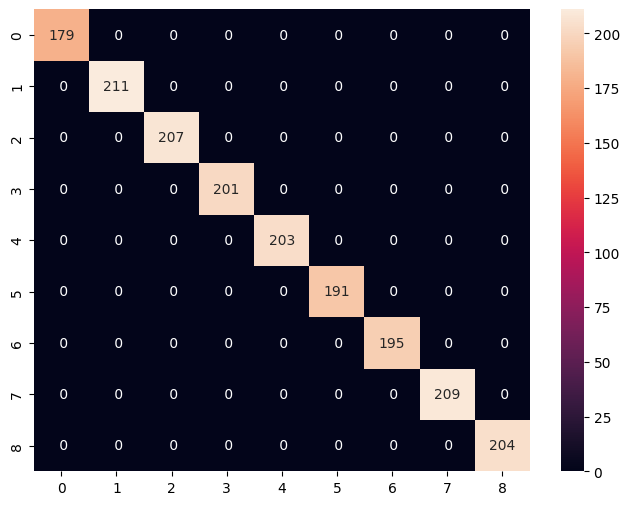

In [ ]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(df_pred['label'],df_pred['pred_labels'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(df_pred['label'],df_pred['pred_labels']), annot=True, fmt='2d')

In [ ]:
#Generating the Classification Report for in-depth analysis
print(classification_report(df_pred['label'],df_pred['pred_labels']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       179
   Gilt-Head Bream       1.00      1.00      1.00       211
   Hourse Mackerel       1.00      1.00      1.00       207
        Red Mullet       1.00      1.00      1.00       201
     Red Sea Bream       1.00      1.00      1.00       203
          Sea Bass       1.00      1.00      1.00       191
            Shrimp       1.00      1.00      1.00       195
Striped Red Mullet       1.00      1.00      1.00       209
             Trout       1.00      1.00      1.00       204

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800

